In [ ]:
tbUseProject('sa-labs-analysis');

### a) Load Test file

In [6]:
dir = fullfile(fileparts(fileparts(which('spike_detection.m'))), 'data');
data = load([dir '/signal-for-spike.dat']);

### b) Detect spikes and create feature

In [7]:
% paramter in seconds
baselineStart = 0.5;
stimTime = 1;
tailTime = 1;
endTime = stimTime + tailTime;
samplingRate = 1e4;

In [14]:
% Time axis

% { baselineIntervalLen }                  {---    responseIntervalLength --}  {-- poststimIntervalLen --}
% |----------------------|-----------------|------------------|---------------|---------------------------|
% -0.5                  <desc>             0.0                <desc>
% (baselineStartTime) (baseLineEnd = 0) (intervalStart = 0) (endOffset = 0) (intervalEnd)           (endTime)

   

In [8]:
% detect the spikes
import sa_labs.common.spike.*;

[spikeTimes, spikeAmplitudes] = mht.spike_util.detectSpikes(data);
n = size(spikeTimes, 1);

features = SpikeTimeFeature.empty(0, n);
for i = 1 : n
    spikeTimesReleativeToStim = spikeTimes{i}/samplingRate - baselineStart;

    f = SpikeTimeFeature(spikeTimesReleativeToStim, -baselineStart, stimTime, samplingRate, endTime) %#ok
    features(i) = f;
end


f = 

[INFO] mean baseline rate is empty; using just base line rate as mean rate
[INFO] mean baseline rate is empty; using just base line rate as mean rate
[INFO] mean baseline rate is empty; using just base line rate as mean rate
[INFO] mean baseline rate is empty; using just base line rate as mean rate
[INFO] mean baseline rate is empty; using just base line rate as mean rate
  SpikeTimeFeature with properties:

                                  spikeTimes: [1×98 double]
                           baselineStartTime: -0.5000
                                    stimTime: 1
                                     endTime: 2
                                samplingRate: 10000
                                 description: [1×1 struct]
                               intervalStart: 0
                            meanBaseLineRate: 0
                                 baseLineEnd: 0
                                 intervalEnd: 1
                                    duration: 2.5000
               

### c) Calculate mean baseline rate and set it to all features

In [9]:
features.setMeanBaseLineRate(mean([features.baseLineRate]));

### d) Plot psth response of the detected spike

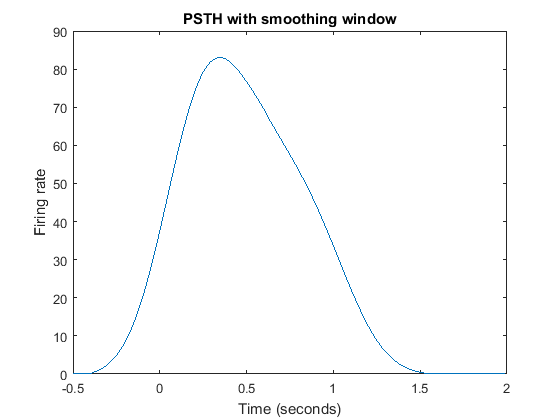

In [10]:
% a) get psth using variable arguments
[x, y] = SpikeTimeFeature.getPSTH(features, 'smoothingWindowPSTH', 0.0001, 'binWidthPSTH', 0.01);

figure()
plot(x, y);
xlabel('Time (seconds)');
ylabel('Firing rate');
title('PSTH with smoothing window');


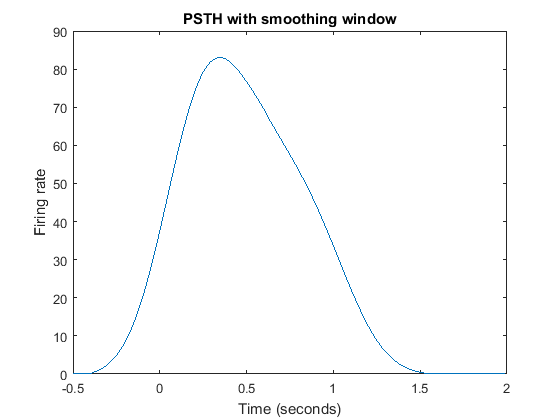

In [11]:
% b) using feature description instance for online analysis with GUI
% control

props = containers.Map();
props('id') = 'PSTH';
props('smoothingWindowPSTH') = 0.0001;
props('binWidthPSTH') =  0.01;
psthDesc = sa_labs.analysis.entity.FeatureDescription(props);

psthHandle = @() SpikeTimeFeature.getPSTH(features, 'description', psthDesc);
[x, y] = psthHandle();
plot(x, y);
xlabel('Time (seconds)');
ylabel('Firing rate');
title('PSTH with smoothing window');


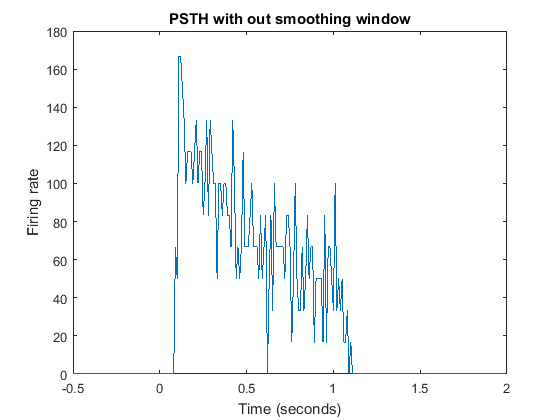

In [12]:
% modifying psthdesc instance
psthDesc.smoothingWindowPSTH = 0;
% gui will reflect the non smoothed psth

figure()
[x, y] = psthHandle();
plot(x, y);
xlabel('Time (seconds)');
ylabel('Firing rate');
title('PSTH with out smoothing window');

### e) Benchmarking spike detection algorithm

In [13]:
disp('Time elapsed for detecting 6 spikes')
tic; mht.spike_util.detectSpikes(data); toc;

Time elapsed for detecting 6 spikes
Elapsed time is 0.502323 seconds.

